# What are the most demanded skills for the top 3 most popular data roles?
 Methodology
* Clean-up skill column
* Calculate skill count based on job_title_short
* Calculate skill percentage
* Plot final findings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

# Load the dataset
data = load_dataset("lukebarousse/data_jobs")

# Convert the train split to a pandas DataFrame
df = data["train"].to_pandas()

# Convert job_posted_date to datetime format
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

# Convert job_skills from string representation of list to actual list
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
df_filterd=df[(df["job_country"]=="India")].copy()

In [4]:
df_explode=df_filterd.explode('job_skills')

In [44]:
df_grouped=df_explode.groupby(["job_skills",'job_title_short']).size().reset_index(name='count').sort_values(by='count',ascending=False)

In [6]:
# Getting top roles
roles=df['job_title_short'].value_counts().index[:3].tolist()
roles=sorted(roles)

In [34]:
merge_df=df_filterd['job_title_short'].value_counts().reset_index(name='total')
merge_df.rename(columns={'index':'job_title_short'},inplace=True)

In [36]:
merged=pd.merge(df_grouped,merge_df,how='left',on='job_title_short')

In [38]:
merged['percentage']=(merged['count']/merged["total"])*100

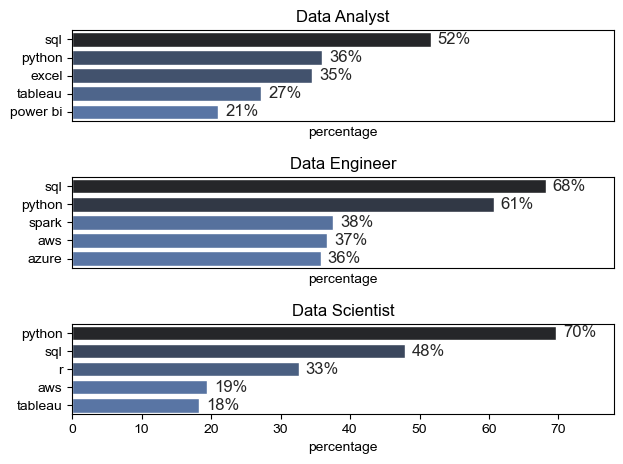

In [40]:
fig,ax=plt.subplots(3,1)
sns.set_theme(style='ticks')
for i,title in enumerate(roles):
    df_plot=merged[merged['job_title_short']==title].head()
    sns.barplot(data=df_plot,x='percentage',y="job_skills",ax=ax[i],hue='count',palette="dark:b_r",legend=False)
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,78)
    ax[i].set_ylabel('')
    for v,n in enumerate(df_plot['percentage']):
        ax[i].text(n+1,v,f"{n:.0f}%",va="center")
    if i !=len(roles)-1 :
        ax[i].set_xticks([])  


plt.tight_layout()    